In [1]:
%matplotlib inline
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [3]:
#读取数据
path = 'C:/Users/tp179902741/Documents/Machine_learning/Kaggle/Bike/'
train=pd.read_csv(path + "train.csv",header=0)
test=pd.read_csv(path + "test.csv",header=0)

In [10]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,date,month,year,weekday,isSunday,time_since_epoch
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,0.869742,1.291725,1.343703,0,1,1,2011,5,0,359400
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,1.162283,1.503301,1.550446,1,1,1,2011,5,0,359401
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,1.026672,1.466077,1.503301,2,1,1,2011,5,0,359402
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,0.869742,1.223156,1.291725,3,1,1,2011,5,0,359403
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.000000,0.526589,0.526589,4,1,1,2011,5,0,359404


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime            10886 non-null object
season              10886 non-null category
holiday             10886 non-null category
workingday          10886 non-null category
weather             10886 non-null category
temp                10886 non-null float64
atemp               10886 non-null float64
humidity            10886 non-null int64
windspeed           10886 non-null float64
casual              10886 non-null float64
registered          10886 non-null float64
count               10886 non-null float64
time                10886 non-null category
date                10886 non-null int64
month               10886 non-null int64
year                10886 non-null int64
weekday             10886 non-null int64
isSunday            10886 non-null int64
time_since_epoch    10886 non-null int32
dtypes: category(5), float64(6), int32(1), int64(6), object(1)
memory usage: 1.2+ MB

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [4]:
comb_data = pd.concat([train, test])

In [5]:
del  test,train

In [5]:
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
atemp         17379 non-null float64
casual        10886 non-null float64
count         10886 non-null float64
datetime      17379 non-null object
holiday       17379 non-null int64
humidity      17379 non-null int64
registered    10886 non-null float64
season        17379 non-null int64
temp          17379 non-null float64
weather       17379 non-null int64
windspeed     17379 non-null float64
workingday    17379 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [6]:
#创造序列
comb_data['time_since_epoch']=np.arange(17379)

In [201]:
#提取年、月、星期、日、时
# comb_data['year'] = pd.DatetimeIndex(comb_data.datetime).year
# comb_data['month'] = pd.DatetimeIndex(comb_data.datetime).month
# comb_data['weekday'] = pd.DatetimeIndex(comb_data.datetime).dayofweek
# comb_data['date'] = pd.DatetimeIndex(comb_data.datetime).day
# comb_data['hour'] = pd.DatetimeIndex(comb_data.datetime).hour
comb_data['isSunday']=np.where(comb_data['weekday']==6,1,0)

In [8]:
comb_data['mID'] = comb_data['datetime'].map(lambda x:''.join(x.split('-')[:2]))

In [218]:
del comb_data['mID']

In [216]:
''.join("ab c".split())

'abc'

In [9]:
comb_data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,time_since_epoch,weekday,date,hour,mID
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,0,5,1,0,201101
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,1,5,1,1,201101
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,2,5,1,2,201101
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,3,5,1,3,201101
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,4,5,1,4,201101


## Visualizing

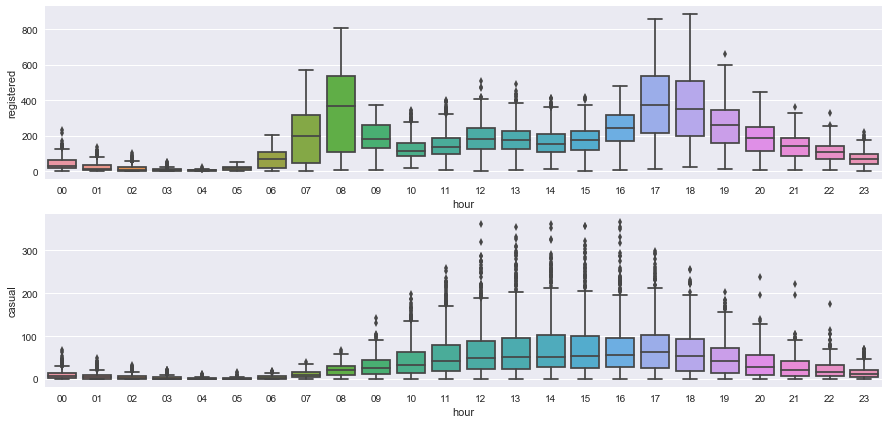

In [57]:
fig,axes = plt.subplots(2,1,figsize=(15,7))
sns.boxplot(x="hour",y="registered",data=comb_data,ax=axes[0])
sns.boxplot(x="hour",y="casual",data=comb_data,ax=axes[1])

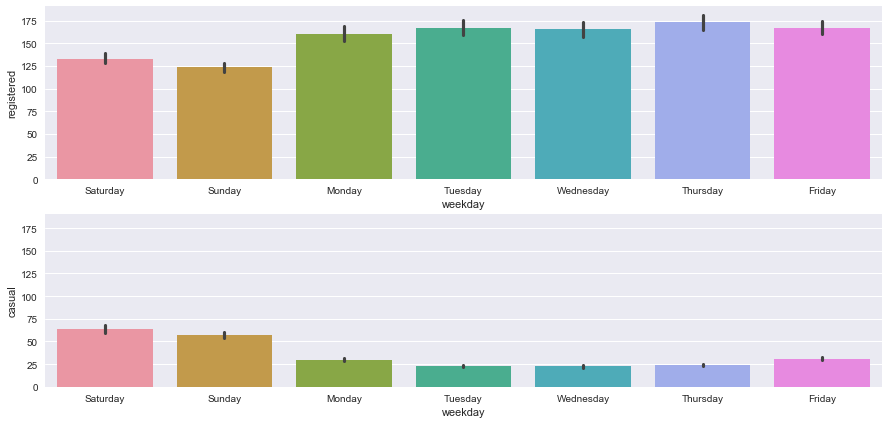

In [60]:
fig,axes = plt.subplots(2,1,figsize=(15,7),sharey=True)
sns.barplot(x="weekday",y="registered",data=comb_data,ax=axes[0])
sns.barplot(x="weekday",y="casual",data=comb_data,ax=axes[1])

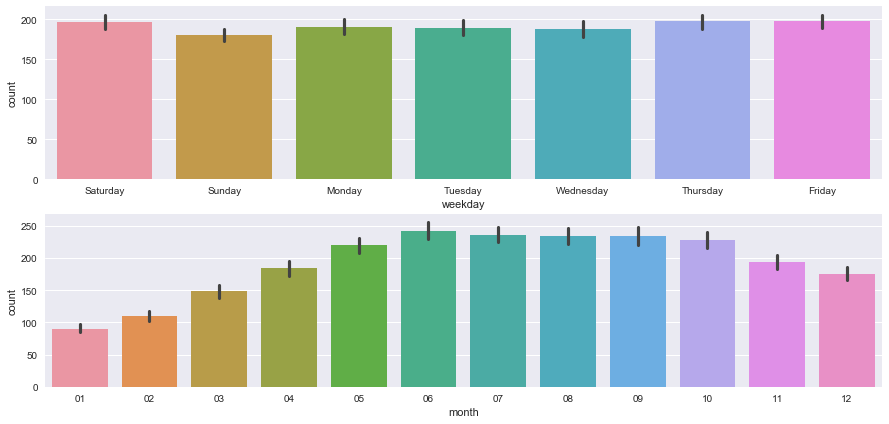

In [61]:
fig,axes = plt.subplots(2,1,figsize=(15,7))
sns.barplot(x="weekday",y="count",data=comb_data,ax=axes[0])
sns.barplot(x="month",y="count",data=comb_data,ax=axes[1])

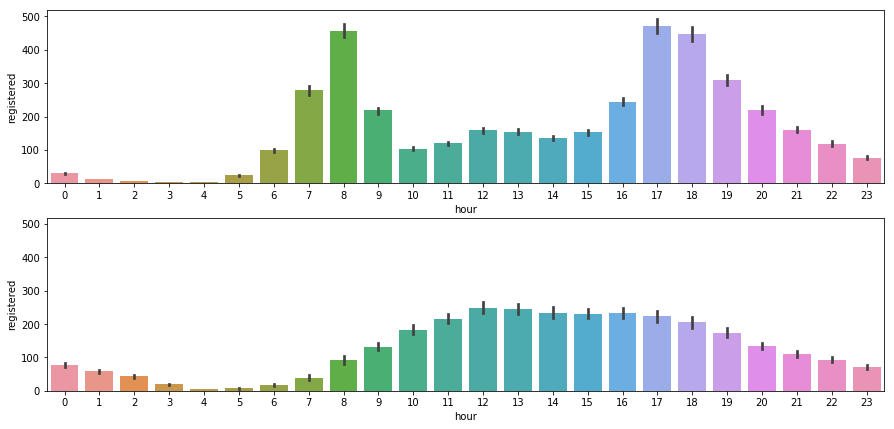

In [27]:
fig,axes = plt.subplots(2,1,figsize=(15,7),sharey=True)
sns.barplot(x="hour",y="registered",data=comb_data[comb_data['workingday']==1],ax=axes[0])
sns.barplot(x="hour",y="registered",data=comb_data[comb_data['workingday']==0],ax=axes[1])

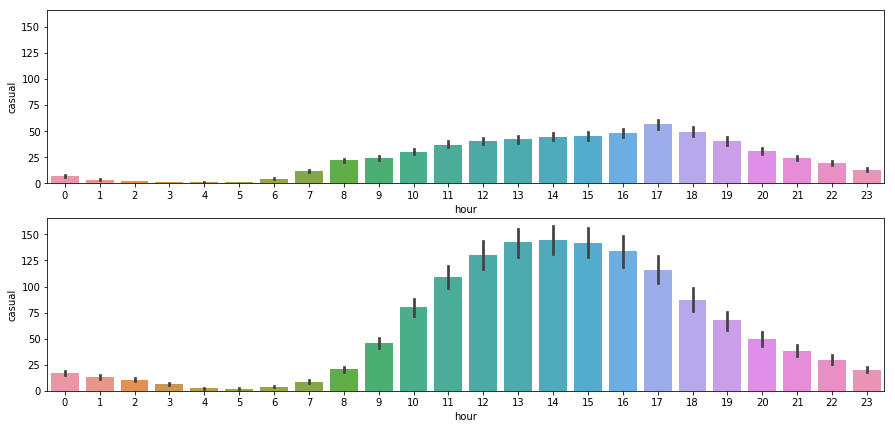

In [28]:
fig,axes = plt.subplots(2,1,figsize=(15,7),sharey=True)
sns.barplot(x="hour",y="casual",data=comb_data[comb_data['workingday']==1],ax=axes[0])
sns.barplot(x="hour",y="casual",data=comb_data[comb_data['workingday']==0],ax=axes[1])

## Experimenting with Attribute Combinations

In [20]:
def pre_Cluster(interval, obj):
    cmean = comb_data[:10886].groupby(interval)[obj].mean()
    cmean=cmean.reset_index()
    return cmean

### hourCluster

In [7]:
comb_data.columns

Index(['atemp', 'casual', 'count', 'datetime', 'holiday', 'humidity',
       'registered', 'season', 'temp', 'weather', 'windspeed', 'workingday',
       'time_since_epoch', 'year', 'month', 'weekday', 'date', 'hour',
       'isSunday'],
      dtype='object')

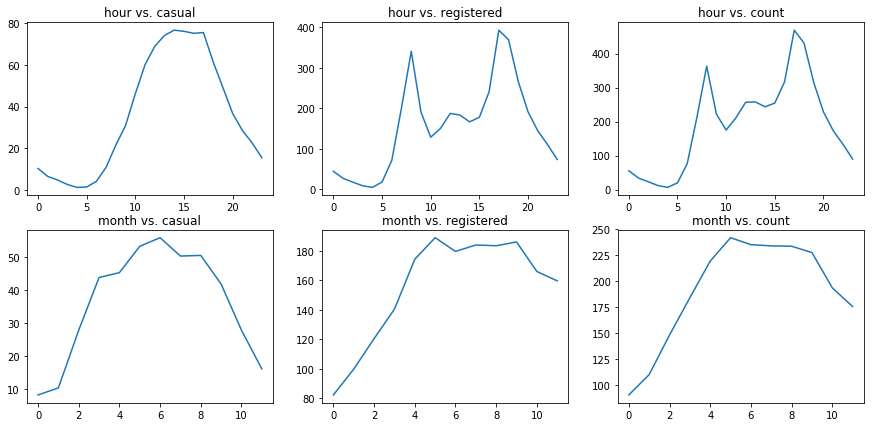

In [53]:
interval_list=['hour','month']
obj_list=['casual','registered','count']
fig,axes = plt.subplots(len(interval_list),len(obj_list),figsize=(15,7))
p,q = -1,-1
for p,i in enumerate(interval_list):
    for q,j in enumerate(obj_list):
        plt_cmean = comb_data.groupby(i)[j].mean()
        plt_cmean=plt_cmean.reset_index()
        axes[p,q].plot(plt_cmean[j])
        axes[p,q].set_title(i+" vs. "+j)

In [7]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k).fit(cmean.values)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

Text(0,0.5,'Silhouette score')

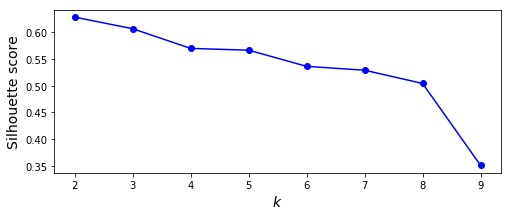

In [56]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(cmean.values, model.labels_,)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])

In [159]:
ckmean = comb_data.groupby(['year','month'])['casual'].mean()

In [167]:
ckmean=cmean2[['id','casual']].values

In [182]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(ckmean)
# kmeans.transform(cmean.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [180]:
kmeans.labels_ 

array([0, 0, 4, 4, 6, 6, 9, 6, 6, 6, 4, 3, 3, 3, 2, 8, 1, 8, 1, 8, 8, 7, 2,
       5])

In [80]:
ckey=hcmean['hour']
cvalue=kmeans.labels_
cdict = dict(zip(ckey, cvalue))

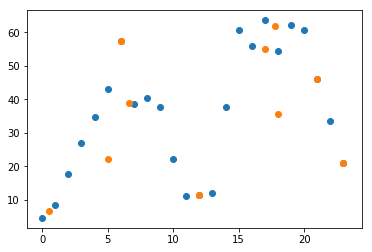

In [183]:
plt.scatter(ckmean[:,0],ckmean[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])

In [ ]:
comb_data['ch_cluster']=comb_data['hour'].map(cdict)

In [131]:
cmean=cmean2[['year','month','casual']].values
# pre_Cluster('month', 'registered').values

In [119]:
plt_data = comb_data[:10886][['year','month','casual']].values

In [133]:
cmean[:,0:2].shape

(24, 2)

In [120]:
plt_data.shape

(10886, 3)

In [124]:
plt_data[:,2].shape

(10886,)

In [157]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_leaf_nodes=7)
dt.fit(cmean[:,0:2], cmean[:,2])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=7, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [141]:
(cmean[:,0]+cmean[:,1]).shape

(24,)

In [142]:
pre_y.shape

(24,)

In [143]:
plt_data[:,2].shape

(10886,)

Text(0.5,1,'Decision Tree Regression')

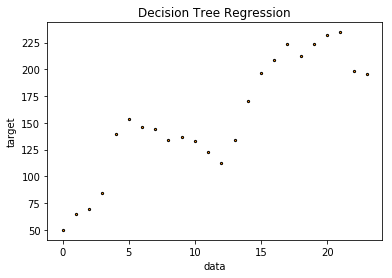

In [16]:
# pre_y=dt.predict(plt_data[:,0:2])
plt.figure()
plt.scatter(np.arange(24), cmean2['registered'], s=5, edgecolor="black",
            c="darkorange", label="data")
# plt.scatter(np.arange(24), pre_y, color="cornflowerblue",
#          label="tree_regressor", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")

In [136]:
pre_y=dt.predict(cmean[:,0:2])

In [138]:
pre_y

array([  9.20888133,   9.20888133,  22.30617454,  22.30617454,
        34.79166667,  43.4008671 ,  43.4008671 ,  43.4008671 ,
        43.4008671 ,  43.4008671 ,  22.26973684,  16.11842105,
         9.20888133,   9.20888133,  37.68351648,  59.49616792,
        59.49616792,  59.49616792,  59.49616792,  59.49616792,
        59.49616792,  45.89473684,  33.4021978 ,  16.11842105])

In [22]:
ckey=cmean2['mID']
cvalue=cmean2['rtype']
cdict = dict(zip(ckey, cvalue))
comb_data['rm_label']=comb_data['mID'].map(cdict)

In [115]:
comb_data['mID']=comb_data.month.copy()

In [162]:
from IPython.display import Image 
from sklearn.tree import export_graphviz
tree = export_graphviz()
dot_data = tree.export_graphviz(decision_tree=dt, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

TypeError: export_graphviz() missing 1 required positional argument: 'decision_tree'

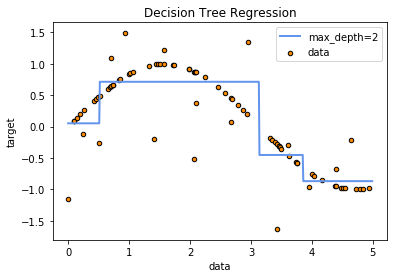

In [130]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

In [29]:
comb_data.columns

Index(['atemp', 'casual', 'count', 'datetime', 'holiday', 'humidity',
       'registered', 'season', 'temp', 'weather', 'windspeed', 'workingday',
       'time_since_epoch', 'weekday', 'date', 'hour', 'mID', 'month',
       'cm_label', 'rm_label'],
      dtype='object')

In [43]:
comb_data['working_time']=comb_data['workingday'].astype('str')+'|'+comb_data['hour'].astype('str')

In [49]:
comb_data['working_time'].unique()

array(['0|0', '0|1', '0|2', '0|3', '0|4', '0|5', '0|6', '0|7', '0|8',
       '0|9', '0|10', '0|11', '0|12', '0|13', '0|14', '0|15', '0|16',
       '0|17', '0|18', '0|19', '0|20', '0|21', '0|22', '0|23', '1|0',
       '1|1', '1|4', '1|5', '1|6', '1|7', '1|8', '1|9', '1|10', '1|11',
       '1|12', '1|13', '1|14', '1|15', '1|16', '1|17', '1|18', '1|19',
       '1|20', '1|21', '1|22', '1|23', '1|2', '1|3'], dtype=object)

In [56]:
cmean2=comb_data[:10886].groupby(['working_time'])[['casual','registered']].mean()

In [58]:
cmean2=cmean2.reset_index()

In [59]:
cmean2['chtype']=pd.qcut(cmean2.casual,7,labels=np.arange(7))
cmean2['rhtype']=pd.qcut(cmean2.registered,7,labels=np.arange(7))

In [63]:
cmean2.head()

,working_time,casual,registered,chtype,rhtype
0,0|0,17.020690,77.468966,2,2
1,0|1,13.048276,58.862069,2,1
2,0|10,80.131034,183.675862,5,4
3,0|11,109.124138,216.262069,6,4
4,0|12,129.793103,249.317241,6,6


In [62]:
ckey=cmean2['working_time']
cvalue=cmean2['rhtype']
cdict = dict(zip(ckey, cvalue))
comb_data['rh_label']=comb_data['working_time'].map(cdict)

In [144]:
def transform_data(df):
    epoch = datetime.utcfromtimestamp(0)
    datetime_values = df['datetime'].values
    time_since_epoch_values = []
    for datetime_value in datetime_values:
        datetime_object = datetime.strptime(datetime_value, '%Y-%m-%d %H:%M:%S')
        time_since_epoch_values.append(int((datetime_object-epoch).total_seconds()/3600))
    df['time_since_epoch'] = time_since_epoch_values
    return df

In [9]:
import sklearn.cluster as cluster

In [12]:
    hour_df = getTimeData(comb_data)
    hour_cluster_data = hour_df.groupby(['hour']).agg(lambda x: x.mean())[['count']]
    hour_clust = cluster.KMeans(n_clusters=6)
    hour_clusters = np.array(hour_clust.fit_predict(split_list(hour_cluster_data.iloc[:,0].values,24)))

    month_df = getMonthData(comb_data)
    month_cluster_data = month_df.groupby(['month']).agg(lambda x: x.mean())[['count']]
    month_clust = cluster.KMeans(n_clusters=4)
    month_clusters = np.array(month_clust.fit_predict(split_list(month_cluster_data.iloc[:,0].values,12)))

In [145]:
transform_data(comb_data)

,Unnamed: 0,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,...,weekday,date,hour,mID,month,cm_label,rm_label,working_time,ch_label,rh_label
0,0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,...,5,1,0,201101,1,0,0,0|0,2,2
1,1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,...,5,1,1,201101,1,0,0,0|1,2,1
2,2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,...,5,1,2,201101,1,0,0,0|2,1,1
3,3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,...,5,1,3,201101,1,0,0,0|3,1,1
4,4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,...,5,1,4,201101,1,0,0,0|4,0,0
5,5,12.880,0.0,1.0,2011-01-01 05:00:00,0,75,1.0,1,9.84,...,5,1,5,201101,1,0,0,0|5,0,0
6,6,13.635,2.0,2.0,2011-01-01 06:00:00,0,80,0.0,1,9.02,...,5,1,6,201101,1,0,0,0|6,1,0
7,7,12.880,1.0,3.0,2011-01-01 07:00:00,0,86,2.0,1,8.20,...,5,1,7,201101,1,0,0,0|7,1,1
8,8,14.395,1.0,8.0,2011-01-01 08:00:00,0,75,7.0,1,9.84,...,5,1,8,201101,1,0,0,0|8,2,2
9,9,17.425,8.0,14.0,2011-01-01 09:00:00,0,76,6.0,1,13.12,...,5,1,9,201101,1,0,0,0|9,4,3


In [ ]:
comb

### monthCluster

In [12]:
cmean2=comb_data[:10886].groupby(['mID'])[['casual','registered']].mean()

In [13]:
cmean2=cmean2.reset_index()

In [23]:
cmean2.head()

,mID,casual,registered,ctype,rtype
0,201101,4.658933,49.986079,0,0
1,201102,8.466368,65.174888,0,0
2,201103,17.735426,69.114350,1,0
3,201104,26.876923,84.149451,2,0
4,201105,34.791667,140.017544,3,3


In [19]:
cmean2['ctype']=pd.qcut(cmean2.casual,7,labels=np.arange(7))
cmean2['rtype']=pd.qcut(cmean2.registered,7,labels=np.arange(7))

In [ ]:
hcmean = comb_data.groupby('month')['registered'].mean()
hcmean=hcmean.reset_index()
plt.plot(hcmean['registered'])
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])

In [72]:
hcmean = pd.DataFrame(comb_data.groupby('month')['count'].mean())

In [73]:
hcmean.reset_index(inplace=True)

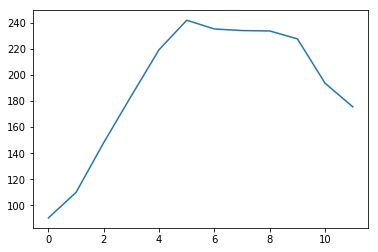

In [74]:
plt.plot(hcmean['count'])
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])

## Prepare the Data

In [192]:
comb_data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,...,hour,mID,month,cm_label,rm_label,working_time,ch_label,rh_label,year,isSunday
0,14.395,1.386294,2.833213,2011-01-01 00:00:00,0,81,2.639057,1,9.84,1,...,0,201101,1,0,0,0|0,2,2,2011,0
1,13.635,2.197225,3.713572,2011-01-01 01:00:00,0,80,3.496508,1,9.02,1,...,1,201101,1,0,0,0|1,2,1,2011,0
2,13.635,1.791759,3.496508,2011-01-01 02:00:00,0,80,3.332205,1,9.02,1,...,2,201101,1,0,0,0|2,1,1,2011,0
3,14.395,1.386294,2.639057,2011-01-01 03:00:00,0,75,2.397895,1,9.84,1,...,3,201101,1,0,0,0|3,1,1,2011,0
4,14.395,0.000000,0.693147,2011-01-01 04:00:00,0,75,0.693147,1,9.84,1,...,4,201101,1,0,0,0|4,0,0,2011,0


In [149]:
comb_data.to_csv(path+"combined_data.csv")

In [199]:
comb_data=pd.read_csv(path + "combined_data.csv")

In [200]:
del comb_data['Unnamed: 0']

In [125]:
del comb_data

In [204]:
pre_test=comb_data[10886:]

In [142]:
del pre_test

In [189]:
pre_test.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,...,weekday,date,hour,mID,month,cm_label,rm_label,working_time,ch_label,rh_label
10886,11.365,NaN,NaN,2011-01-20 00:00:00,0,56,NaN,1,10.66,1,...,3,20,0,201101,1,0,0,1|0,1,1
10887,13.635,NaN,NaN,2011-01-20 01:00:00,0,56,NaN,1,10.66,1,...,3,20,1,201101,1,0,0,1|1,0,0
10888,13.635,NaN,NaN,2011-01-20 02:00:00,0,56,NaN,1,10.66,1,...,3,20,2,201101,1,0,0,1|2,0,0
10889,12.880,NaN,NaN,2011-01-20 03:00:00,0,56,NaN,1,10.66,1,...,3,20,3,201101,1,0,0,1|3,0,0
10890,12.880,NaN,NaN,2011-01-20 04:00:00,0,56,NaN,1,10.66,1,...,3,20,4,201101,1,0,0,1|4,0,0


In [203]:
#转换target
comb_data['count'] = np.log(comb_data['count']+1)
comb_data['casual'] = np.log(comb_data['casual']+1)
comb_data['registered'] = np.log(comb_data['registered']+1)

In [226]:
# features=['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','weekday','year','hourCluster','monthCluster']
features1 = ['atemp','humidity','season', 'temp', 'weather', 'windspeed', 'workingday','time_since_epoch', 'weekday','hour','cm_label','ch_label']
features2 = ['atemp','humidity','season', 'temp', 'weather', 'windspeed', 'workingday','time_since_epoch', 'weekday','hour','rm_label','rh_label']
# train_features = features
# X_train_data = train[train_features].values
# y_train_data = train[['casual', 'registered']].values

In [207]:
del comb_data

In [206]:
# split vali_train_set and vali_test_set
vl_train = comb_data[:10886][comb_data[:10886]['date']!=19]
vl_test = comb_data[:10886][comb_data[:10886]['date']==19]

In [227]:
vl_trainyc = vl_train['casual'].values
vl_trainyr = vl_train['registered'].values
vl_trainyt = vl_train['count'].values
# vl_train = vl_train[features].values
vl_train1 = vl_train[features1].values
vl_train2 = vl_train[features2].values

In [228]:
vl_testc = vl_test['casual'].values
vl_testr = vl_test['registered'].values
vl_testt = vl_test['count'].values
# vl_test = vl_test[features].values
vl_test1 = vl_test[features1].values
vl_test2 = vl_test[features2].values

In [229]:
pre_test1 = pre_test[features1].values
pre_test2 = pre_test[features2].values

In [108]:
pre_test = pre_test.drop(['month','datetime','date'],axis=1)

In [13]:
#改造vl_test
vl_test=pd.concat([vl_test,comp])

### Pipeline

In [81]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'time', 'date', 'month', 'year', 'weekday', 'isSunday',
       'time_since_epoch'],
      dtype='object')

In [14]:
# DataframeSelector 
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [15]:
from sklearn.pipeline import Pipeline
from future_encoders import OneHotEncoder
from sklearn.pipeline import FeatureUnion

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(['season','holiday','workingday','weather','time'])),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

# ['workingday', 'season', 'hour','year','hCluster','mCluster','weekday','weather','holiday']

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(['temp','atemp','humidity','windspeed','weekday','month', 'year', 'isSunday', 'time_since_epoch'])),
    ])

# ['atemp', 'humidity','temp','windspeed']
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [16]:
X = preprocess_pipeline.fit_transform(vl_train)
T = preprocess_pipeline.fit_transform(vl_test)

In [109]:
Ttest= preprocess_pipeline.fit_transform(pre_test)

In [187]:
print(vl_train.shape, vl_test.shape)

(10312, 13) (574, 13)


In [19]:
print(X.shape,T.shape)

(10312, 55) (574, 55)


In [18]:
T=np.delete(T,np.s_[-2:],0)

In [253]:
T= np.concatenate([T,np.ones([9738,55])])

## Select and Train a Model

In [84]:
def RMSLEscores(estimator1,estimator2,tx1,tx2,ty):

    pre_count = remove_negative(np.expm1(estimator1.predict(tx1))) + remove_negative(np.expm1(estimator2.predict(tx2)))
    n = len(ty)
    summation_arg = (np.log(pre_count+1.) - ty)**2.
    rmsle = np.sqrt(np.sum(summation_arg)/n)
    return rmsle 

In [ ]:
vl_trainyc = vl_train['casual']
vl_trainyr = vl_train['registered']
vl_trainyt = vl_train['count']
vl_train1
vl_train2
vl_testc = vl_test['casual']
vl_testr = vl_test['registered']
vl_testt = vl_test['count']
vl_test1
vl_test2

In [29]:
# model
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [231]:
# svc = SVC()
# knn = KNeighborsRegressor()
# dt1 = DecisionTreeRegressor()
# dt2 = DecisionTreeRegressor()
rf1 = RandomForestRegressor(n_estimators=1000,min_samples_split=11,n_jobs=-1)
gbdt1 = GradientBoostingRegressor(n_estimators=100, max_depth = 6)
rf2 = RandomForestRegressor(n_estimators=1000,min_samples_split=11,n_jobs=-1)
gbdt2 = GradientBoostingRegressor(n_estimators=100, max_depth = 6)
# clfs = [[dt1,dt2],[rf1,rf2],[gbdt1,gbdt2]]

In [232]:
rf1.fit(vl_train1, vl_trainyc)
print('estimator1 done')
rf2.fit(vl_train2, vl_trainyr)
print('estimator2 done')

estimator1 done
estimator2 done


In [233]:
RMSLEscores(rf1,rf2,vl_test1,vl_test2, vl_testt)

0.28173867041419975

In [224]:
sorted(zip(rf1.feature_importances_, features1), reverse=True)

[(0.59367317497223093, 'ch_label'),
 (0.20671508614565093, 'temp'),
 (0.041212327599360873, 'time_since_epoch'),
 (0.033612385372155447, 'hour'),
 (0.029362005518350248, 'atemp'),
 (0.02798389737853009, 'cm_label'),
 (0.025803661340091683, 'humidity'),
 (0.015541380140565365, 'weather'),
 (0.011003965586834594, 'weekday'),
 (0.0072668128210094576, 'windspeed'),
 (0.0039521747597255239, 'workingday'),
 (0.0024790848218795526, 'season'),
 (0.00073459152768935265, 'isSunday'),
 (0.00065945201592535613, 'holiday')]

In [225]:
sorted(zip(rf2.feature_importances_, features2), reverse=True)

[(0.82105217472539538, 'rh_label'),
 (0.099484812867068562, 'time_since_epoch'),
 (0.026073602797024129, 'hour'),
 (0.01134048547419139, 'weather'),
 (0.010198225009733766, 'weekday'),
 (0.0075953541163306772, 'humidity'),
 (0.0049899057920533771, 'atemp'),
 (0.0048696122632982917, 'temp'),
 (0.0035892385565298385, 'rm_label'),
 (0.0033882623723312725, 'workingday'),
 (0.0032486491920306966, 'windspeed'),
 (0.0022090236356968728, 'season'),
 (0.00098643422488329017, 'holiday'),
 (0.00097421897343255559, 'isSunday')]

In [83]:
def remove_negative(items):
    newlist = []
    for item in items:
        if item>0:
            newlist.append(item)
        else:
            newlist.append(0)
    return np.array(newlist)

In [234]:
gbdt1.fit(vl_train1, vl_trainyc)
print('estimator1 done')
gbdt2.fit(vl_train2, vl_trainyr)
print('estimator2 done')

estimator1 done
estimator2 done


In [235]:
RMSLEscores(gbdt1,gbdt2,vl_test1,vl_test2, vl_testt)

0.2764426723430648

In [120]:
from sklearn.ensemble import VotingClassifier

voting_clf1 = VotingClassifier(
    estimators=[('gbdt1',gbdt1),('rf1',rf1)],
    voting='soft')
voting_clf1.fit(vl_train1, vl_trainyc)
print('estimator1 done')

voting_clf2 = VotingClassifier(
    estimators=[('gbdt2',gbdt2),('rf2',rf2)],
    voting='soft')
voting_clf2.fit(vl_train2, vl_trainyr)
print('estimator2 done')

estimator1 done
estimator2 done


In [264]:
from sklearn.feature_selection import SelectFromModel

simplified_modelc = SelectFromModel(rf1, prefit=True)
cX = simplified_modelc.transform(X)
simplified_modelr = SelectFromModel(rf2, prefit=True)
rX = simplified_modelr.transform(X)

In [265]:
cT = simplified_modelc.transform(T)
rT = simplified_modelr.transform(T)

In [274]:
del cT, rT, rX, cX

In [94]:
val_error=[]
for n_estimators in range(1, 500):
    rf1.n_estimators = n_estimators
    rf2.n_estimators = n_estimators
    rf1.fit(vl_train1, vl_trainyc)
    rf2.fit(vl_train2, vl_trainyr)
    val_error += [RMSLEscores(rf1,rf2,vl_test1, vl_test2,vl_testt)]
    if n_estimators ==500:
        print("500 done")

In [95]:
len(val_error)

499

In [26]:
np.argmin(val_error)

172

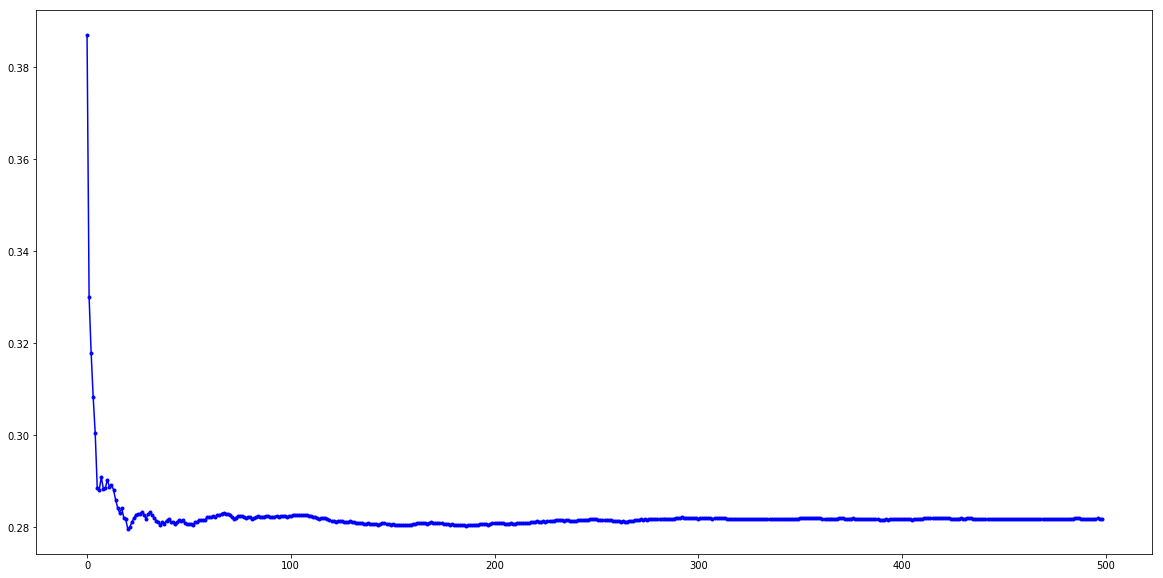

In [96]:
plt.figure(figsize=(20, 10))
plt.plot(val_error, "b.-")

In [ ]:
def RMSLEscores(estimator1,estimator2,tx,ty):
#     estimator1.fit(X, trcy)
#     print('estimator1 done')
#     estimator2.fit(X, trry)
#     print('estimator2 done')
    pre_count = estimator1.predict(tx) + estimator2.predict(tx)
    n = len(ty)
    summation_arg = (np.log(pre_count+1.) - np.log(ty+1.))**2.
    rmsle = np.sqrt(np.sum(summation_arg)/n)
    return rmsle 

In [29]:
a=1
b=2
print(a,b)

1 2


In [34]:
rf_error=[]
for per in range(4,30):   
    rf1 = RandomForestRegressor(n_estimators=200,min_samples_split=per,n_jobs=-1,random_state=42)
    rf2 = RandomForestRegressor(n_estimators=200,min_samples_split=per,n_jobs=-1,random_state=42)    
    
    rf1.fit(X, vl_trainyc)   
    rf2.fit(X, vl_trainyr)
     
    error = RMSLEscores(rf1,rf2,T,vl_testt)
    rf_error += [error]
    print(per,error)

estimator1 done
estimator2 done
3 0.343390061251
estimator1 done
estimator2 done
4 0.342024081994
estimator1 done
estimator2 done
5 0.341974091979
estimator1 done
estimator2 done
6 0.339527989965
estimator1 done
estimator2 done
7 0.340445696148
estimator1 done
estimator2 done
8 0.341758563021
estimator1 done
estimator2 done
9 0.34234403274
estimator1 done
estimator2 done
10 0.342040016668
estimator1 done
estimator2 done
11 0.341735538684


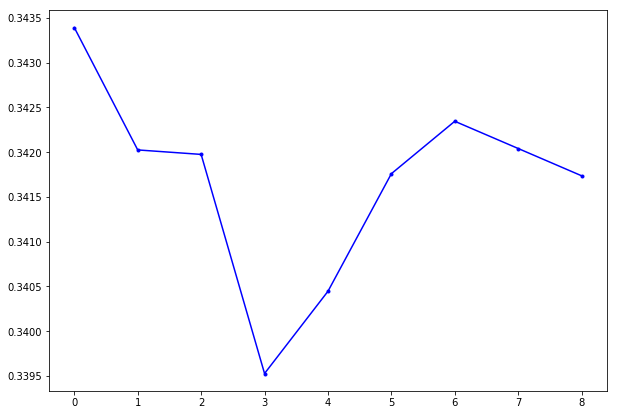

In [35]:
plt.figure(figsize=(10, 7))
plt.plot(rf_error, "b.-")

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt1 = GradientBoostingRegressor(max_depth=3, n_estimators=150, learning_rate=0.1, random_state=42)
gbrt2 = GradientBoostingRegressor(max_depth=3, n_estimators=150, learning_rate=0.1, random_state=42)
gbrt1.fit(X, vl_trainyc)
print('estimator1 done')
gbrt2.fit(X, vl_trainyr)
print('estimator2 done')

estimator1 done
estimator2 done


In [36]:

# n = len(vl_testt)
# for per in range(3,7):   
#     gbrt1 = GradientBoostingRegressor(max_depth=per,n_estimators=150)
#     gbrt2 = GradientBoostingRegressor(max_depth=per,n_estimators=150)
    
#     gbrt1.fit(X, vl_trainyc)
#     print('estimator1 done')    
#     gbrt2.fit(X, vl_trainyr)
#     print('estimator2 done')
 
#     gb_error=[]
#     total_predict = gbrt1.staged_predict(T) + gbrt1.staged_predict(T)
#     for pre_count in total_predict:        
#         summation_arg = (np.log(pre_count+1.) - np.log(ty+1.))**2.
#         gb_error += [np.sqrt(np.sum(summation_arg)/n)]



In [ ]:
plt.figure(figsize=(11, 4))
plt.plot(val_error, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

## Final

In [236]:
output = pre_count = remove_negative(np.expm1(gbdt1.predict(pre_test1))) + remove_negative(np.expm1(gbdt2.predict(pre_test2)))
tt=pd.DataFrame({'count':output})  
tt.to_csv(path+'test.csv',index=False)  

separately
log value
use the first 19 days of every month as train data
2000 trees? minimum number of samples required to split
standardization: 'windspeed','temp','humidity','atemp'
ensemble: rf, gb